# Reducible and Irreducible error in regresion

let's assume that we have a random variable $Y$ such that, given some other variables $X$ (called regresors, features, explanatory variables, etc), we want to obtain a relation between them.

Now, assuming that we can hue the values obtained by $Y$ including only those that have a set of specific regresors $X_0$, we can talk about a "sub-random" variable called $Y[X_0]$, that has an own specific distribution with mean $\mu[X_0]$. We make the assumption that around that mean, $Y[X_0]$ follows a distribution:

$$
Y[X_0] = \mu[X_0] + \epsilon[X_0]
$$

Where $\epsilon[X_0]$ is another random variable that we call the irreducible error. Now, as we stated, $E[Y[X_0]] = \mu[X_0]$, but also, by the previous eq, we have that

$$
E[Y[X_0]] = E[ \mu[X_0] + \epsilon[X_0] ] = \mu[X_0] + E[\epsilon[X_0]]
$$

Which means that, as $E[Y[X_0]] = \mu[X_0]$, then $E[\epsilon[X_0]] = 0$.

To ilustrate that, let's create a random variable that depends on a regresor $x$

In [1]:
# we import libraries first
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# We create a random variable Y that recieves a regresor x, and returns x + a random error term e
# that will follow a normal distribution with mean 0 and standard deviation 1.

def Y(x):
    e = np.random.normal(0, 1)
    return x + e

In a pure sense, if we want to make a regression, $Y$ should not be perfectly described by $x$, in a way that $Y$ in order to have a full piucture as random, $X$ should also be, that is, $X$ is a random variable too, and ($X$, $Y$) is a random vector. Just to ilustrate this, if we assume that $X$ has an uniform distribution, the pdf is

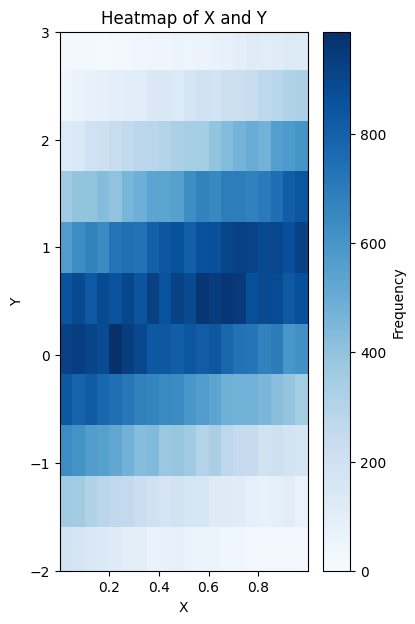

In [16]:
# We create for X a random uniform variable between 0 and 1
def X():
    return np.random.uniform(0, 1)

# We create a list of 1000 values of X and Y
X_values = [X() for i in range(100000)]
Y_values = [Y(x) for x in X_values]

# We plot the values of X and Y in a heatmap
plt.figure(figsize=(4, 7))
plt.hist2d(X_values, Y_values, bins=20, cmap='Blues')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap of X and Y')
plt.colorbar(label='Frequency')
# we restrict the y axis to be between -2 and 3
plt.ylim(-2, 3)
plt.show()

Now, under the assumtion that we don't know that the relation between $X$ is exactly of the form $Y = X + \epsilon$, we make a regression.

For a regression, our goal is to estimate the function $\mu[X]$ with the available data. In that sense, we must obtain something of the form $\hat{\mu}[X] = f(X, \beta)$, where this is our estimation of $\mu$, and $f$ may take any desired form. $\beta$ are the parameters that shape $f$, and that need to be defined to estimate $\mu$